### HRV data preprocessing for FL research

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
# from PIL import Image

In [43]:
# HRV 데이터셋 불러오기
hrv_df = pd.read_csv('E:/RESEARCH/Datasets/HRV_samsung/HRV_REV_all.csv', sep=',')
hrv_df

,sub,VISIT,disorder,age,gender,HAMD,HAMA,PDSS,ASI,APPQ,...,cRMSSD,cVLF,cLF,cHF,cLF/HF,cPOWER,cHR,cRESP,cSC,cTEMP
0,E001,4,2,23,1,2,2,1,12,22,...,41.544667,190.107000,298.508333,206.862333,1.284000,695.477333,65.707000,14.054333,3.911333,34.998000
1,E001,5,2,23,1,12,7,0,12,24,...,39.825333,143.756667,115.695333,202.602667,0.585000,462.054667,69.040000,14.117333,6.255000,35.544333
2,E002,1,2,38,1,14,17,14,31,122,...,20.052000,22.006000,50.182000,32.529333,2.499333,104.717000,92.789333,11.013333,0.945667,35.086000
3,E002,2,2,38,1,13,36,16,32,139,...,20.201667,55.579000,84.441000,18.754000,5.803000,158.774333,85.980667,12.608333,0.785667,36.141000
4,E002,3,2,38,1,7,10,11,23,70,...,74.788000,182.229000,530.565667,546.574000,1.685667,1259.368667,84.368667,14.285667,0.648000,35.879000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,E107,5,2,33,2,3,8,13,34,106,...,15.401300,52.557700,59.654300,35.842300,1.643670,148.054000,78.424000,16.512000,0.310333,33.632000
475,E108,1,2,27,2,29,25,24,55,145,...,700.441000,8192.650000,44542.000000,30821.600000,1.130000,83556.200000,120.273000,12.343300,6.916330,34.365000
476,E108,2,2,27,2,19,16,19,45,151,...,279.414000,614.946000,1881.710000,2905.690000,0.769000,5402.340000,106.897000,13.395700,0.964333,33.771700
477,E108,3,2,27,2,15,12,20,46,158,...,35.886700,107.843000,67.178000,73.165000,0.937333,248.186000,76.818300,12.974000,0.279667,32.410300


In [3]:
hrv_df.shape

(479, 93)

##### index 범주 만들어줄 항을 생성 및 범주화

In [4]:
hrv_df['IndexH']=0

In [5]:
hrv_df.loc[hrv_df['HAMD']<=6, 'IndexH'] =0
hrv_df.loc[(hrv_df['HAMD']>6) & (hrv_df['HAMA']<=17), 'IndexH'] = 1
hrv_df.loc[(hrv_df['HAMD']>17) & (hrv_df['HAMA']<=25), 'IndexH'] = 2
hrv_df.loc[hrv_df['HAMD']>25, 'IndexH'] = 3

In [6]:
hrv_df.head() #제대로 분류되었는지 확인

,sub,VISIT,disorder,age,gender,HAMD,HAMA,PDSS,ASI,APPQ,...,cVLF,cLF,cHF,cLF/HF,cPOWER,cHR,cRESP,cSC,cTEMP,IndexH
0,E001,4,2,23,1,2,2,1,12,22,...,190.107000,298.508333,206.862333,1.284000,695.477333,65.707000,14.054333,3.911333,34.998000,0
1,E001,5,2,23,1,12,7,0,12,24,...,143.756667,115.695333,202.602667,0.585000,462.054667,69.040000,14.117333,6.255000,35.544333,1
2,E002,1,2,38,1,14,17,14,31,122,...,22.006000,50.182000,32.529333,2.499333,104.717000,92.789333,11.013333,0.945667,35.086000,1
3,E002,2,2,38,1,13,36,16,32,139,...,55.579000,84.441000,18.754000,5.803000,158.774333,85.980667,12.608333,0.785667,36.141000,0
4,E002,3,2,38,1,7,10,11,23,70,...,182.229000,530.565667,546.574000,1.685667,1259.368667,84.368667,14.285667,0.648000,35.879000,1


In [7]:
#disorder, sub, Visit, 10개변수 값은 pixel에 넣지 않음. (총 13개 제거)
hrv_drop = hrv_df.drop(['sub','disorder','VISIT','HAMD', 'HAMA','PDSS','ASI','APPQ','PSWQ','SPI','PSS','BIS','SSI','IndexH'], axis=1)
# hrv_drop = hrv_df.drop(['sub','disorder','VISIT','HAMD', 'HAMA','PDSS','ASI','APPQ','PSWQ','SPI','PSS','BIS','SSI'], axis=1)
hrv_drop.head()

,age,gender,b1SDNN,b1NN50,b1PNN50,b1RMSSD,b1VLF,b1LF,b1HF,b1LF/HF,...,cRMSSD,cVLF,cLF,cHF,cLF/HF,cPOWER,cHR,cRESP,cSC,cTEMP
0,23,1,53.113667,14.333333,0.233000,56.151000,100.156000,99.322333,315.010667,0.319333,...,41.544667,190.107000,298.508333,206.862333,1.284000,695.477333,65.707000,14.054333,3.911333,34.998000
1,23,1,45.919000,13.666667,0.210000,46.576000,101.827333,204.858333,235.766333,0.914667,...,39.825333,143.756667,115.695333,202.602667,0.585000,462.054667,69.040000,14.117333,6.255000,35.544333
2,38,1,26.377667,0.000000,0.000000,15.102000,131.038333,88.803333,42.704000,2.854667,...,20.052000,22.006000,50.182000,32.529333,2.499333,104.717000,92.789333,11.013333,0.945667,35.086000
3,38,1,24.147333,0.000000,0.000000,13.519333,132.222000,177.344000,47.517000,4.686333,...,20.201667,55.579000,84.441000,18.754000,5.803000,158.774333,85.980667,12.608333,0.785667,36.141000
4,38,1,79.460333,6.000000,0.066333,87.518667,84.822667,326.738667,303.335333,0.817333,...,74.788000,182.229000,530.565667,546.574000,1.685667,1259.368667,84.368667,14.285667,0.648000,35.879000


In [8]:
# target을 disorder로 놓으면
y = hrv_df.loc[:,['IndexH']]

In [9]:
y

,IndexH
0,0
1,1
2,1
3,0
4,1
...,...
474,0
475,3
476,2
477,1


In [10]:
# 환자만 따로 뽑으면
patient = hrv_df.loc[:, ['sub']]

In [11]:
x = hrv_drop

##### 이제 총 81개의 column으로 구성되었으니까 우선 normalization 하자 (0~1 사이 값으로 범위변환)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hrv_drop[:] = scaler.fit_transform(hrv_drop[:])

In [13]:
hrv_drop.head()

,age,gender,b1SDNN,b1NN50,b1PNN50,b1RMSSD,b1VLF,b1LF,b1HF,b1LF/HF,...,cRMSSD,cVLF,cLF,cHF,cLF/HF,cPOWER,cHR,cRESP,cSC,cTEMP
0,-1.277935,-1.312094,0.222850,1.889593,2.212832,0.192138,-0.087836,-0.103956,-0.067502,-0.679771,...,-0.012434,-0.080355,-0.085651,-0.084088,-0.613387,-0.087092,-0.814325,0.661662,1.449436,0.429974
1,-1.277935,-1.312094,0.083066,1.771122,1.929051,0.060696,-0.087651,-0.095142,-0.083695,-0.484360,...,-0.033415,-0.087077,-0.099528,-0.084722,-0.761271,-0.096138,-0.522467,0.704500,2.752076,0.806835
2,-0.296537,-1.312094,-0.296598,-0.657524,-0.661992,-0.371365,-0.084411,-0.104834,-0.123147,0.152424,...,-0.274717,-0.104731,-0.104501,-0.110031,-0.356265,-0.109984,1.557171,-1.406125,-0.198920,0.490677
3,-0.296537,-1.312094,-0.339931,-0.657524,-0.661992,-0.393091,-0.084280,-0.097440,-0.122163,0.753648,...,-0.272890,-0.099863,-0.101900,-0.112081,0.342676,-0.107890,0.960962,-0.321574,-0.287850,1.218416
4,-0.296537,-1.312094,0.734733,0.408711,0.156448,0.622739,-0.089537,-0.084963,-0.069888,-0.516308,...,0.393247,-0.081498,-0.068036,-0.033533,-0.528408,-0.065241,0.819805,0.818961,-0.364367,1.037688


In [14]:
hrv_drop = hrv_drop.dropna()

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

383
96
383
96


In [81]:
y_train

,IndexH
50,1
78,1
430,2
197,0
149,0
...,...
343,0
359,0
323,0
280,1


In [82]:
hrv_drop.isnull().sum()

age        0
gender     0
b1SDNN     0
b1NN50     0
b1PNN50    0
          ..
cPOWER     0
cHR        0
cRESP      0
cSC        0
cTEMP      0
Length: 80, dtype: int64

In [83]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [84]:
print(model.score(x_train, y_train))

0.7467362924281984


In [85]:
x.shape

(479, 80)

In [86]:
y.shape

(479, 1)

#### 시도 1

In [87]:
from sklearn.datasets import load_iris, load_breast_cancer # dataset 
from sklearn.linear_model import LogisticRegression # 모델 생성 
from sklearn.metrics import accuracy_score, confusion_matrix # 분류정확도, 교차분할표 : 모델 평가 

In [88]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial') 
model.fit(x_train, y_train)

c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial', random_state=0)

In [89]:
y_pred = model.predict(x_train)

In [90]:
acc = accuracy_score(y_train, y_pred) 
print('accuracy =', acc) 

accuracy = 0.7467362924281984


In [91]:
con_mat = confusion_matrix(y_true=y_train, y_pred=y_pred) 
con_mat

array([[216,  15,   3,   2],
       [ 54,  50,   1,   0],
       [ 10,   4,  11,   0],
       [  5,   2,   1,   9]], dtype=int64)

In [92]:
y_pred2 = model.predict(x_test)

In [93]:
acc2 = accuracy_score(y_test, y_pred2) 
print('accuracy =', acc2) 

accuracy = 0.6666666666666666


In [94]:
con_mat2 = confusion_matrix(y_true=y_test, y_pred=y_pred2) 
con_mat2

array([[55,  7,  1,  0],
       [14,  6,  1,  1],
       [ 5,  0,  2,  1],
       [ 1,  1,  0,  1]], dtype=int64)

In [95]:
acc = (con_mat[0,0] + con_mat[1,1] + con_mat[2,2])/len(y_train) 
print('accuracy =', acc) 

accuracy = 0.7232375979112271


In [96]:
import seaborn as sn # heatmap - Accuracy Score 
import matplotlib.pyplot as plt

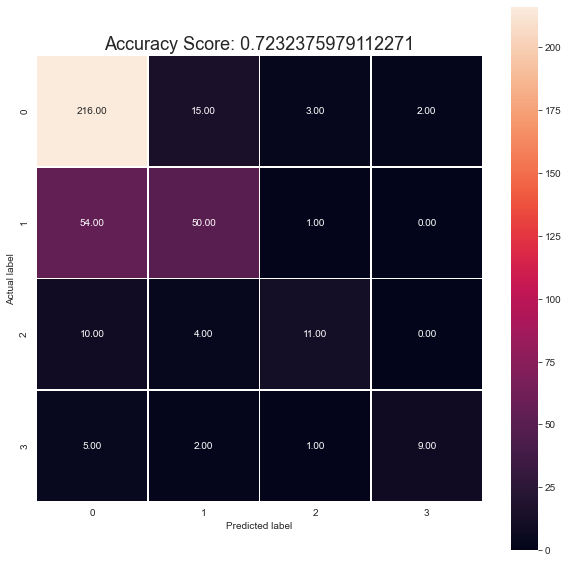

In [98]:
plt.figure(figsize=(10,10)) # chart size 
sn.heatmap(con_mat, annot=True, fmt=".2f", linewidths=.5, square = True);
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
sns.set_style('whitegrid')
plt.title(all_sample_title, size = 18) 
plt.show() 

#### 시도 2

##### 여기서부터는 hrv_81 데이터를 쓰도록 하자.
- sub, disorder, visit, 10개주요 변수를 제거하였음(80 rows가 되었음)
- 9 x 9 형태를 맞춰주기 위해서 null1 rows 추가
- 각 row별로 normalize해서 0~1사이로 값을 맞춰주었음

In [31]:
# hrv_81.shape

In [ ]:
#값이 어떻게 표기되는지 x0를 통해서 확인해보자
x0=hrv_81.loc[479].values

In [ ]:
x0

In [ ]:
# 9 x 9으로 reshape
x0=x0.reshape(9,9)

In [ ]:
# heatmap으로 체크해봄. 근데 heatmap보다 그냥 plt.imsho()써서 gray scale로 보는게 가독성 있을듯
# x0 = sns.heatmap(x0)

In [ ]:
#gray scale로 확인해보고
plt.imshow(x0, cmap='gray')

In [ ]:
hrv_81.loc[0] #확인했으니까 이제 우리 데이터를 가지고

In [ ]:
hrv_81.shape

In [ ]:
hrv_81_arr = hrv_81.values
hrv_81_arr.shape

In [ ]:
# array 형태로 480개 행에 대해서 9 x 9 reshape
hrv_array = hrv_81_arr.reshape(480,9,9)

In [ ]:
hrv_array.shape

In [ ]:
# data = pd.concat([hrv_100,hrv_target], axis=1)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/cat_hamd/y.npy', y)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y1.npy', y1)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y2.npy', y2)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y3.npy', y3)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y4.npy', y4)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y5.npy', y5)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y6.npy', y6)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y7.npy', y7)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y8.npy', y8)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y9.npy', y9)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y10.npy', y10)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/cat_hamd/x.npy', hrv_array)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/cat_hamd/patient.npy', patient)

In [ ]:
# 확인해보자
# xdata = np.load('E:/RESEARCH/Datasets/HRV_samsung/cat_hamd/x.npy')

In [ ]:
# xdata

In [ ]:
# xdata[0].shape